In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw
from scipy.fftpack import fft, fftshift, ifft, ifftshift, fftfreq

In [5]:
def _rstar_to_r(rs, M):
    rs = np.array(rs)
    return (2*M*(1 + lambertw(np.exp(rs/(2*M) - 1)))).real
    
def _r_to_rstar(r, M):
    r = np.array(r)
    if np.any(r <= 2*M):
        raise ValueError("All r must be > 2M")
    return r + 2*M*np.log(r/(2*M) - 1)

def Vpm(r, M, l, parity):
    if parity == 'axial':
        V = (1-2*M/r)*(l*(l+1)/r**2 - 6*M/r**3)
    elif parity == 'polar':
        n = 1/2*(l-1)*(l+2)
        num = 2*(1-2*M/r)*(
            9*M**3 +
            9*n*M**2*r + 
            3*n**2*M*r**2 + 
            n**2*(1 + n)*r**3
        )
        den = r**3*(3*M + n*r)**2
        V = num/den
    else:
        raise ValueError("parity needs to be either: axial or polar")
    return V

M = 1

In [6]:
print(_r_to_rstar(3.28078, 1))

2.3894241735560575


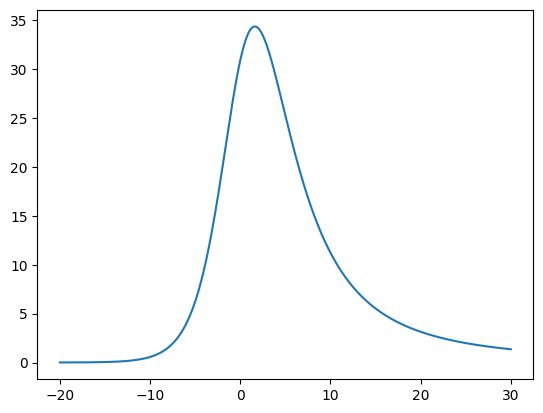

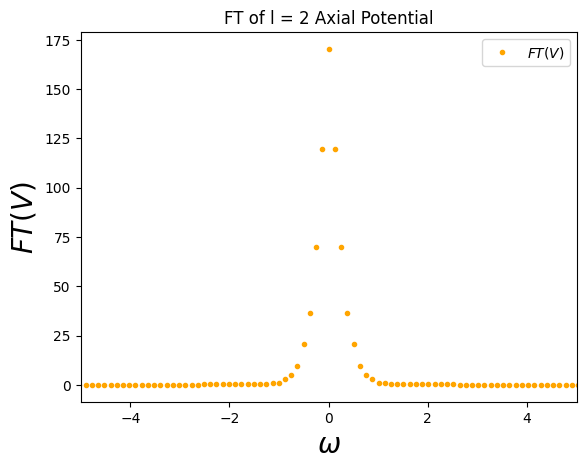

0.0
34.370383613600495 5.862625999805931


In [30]:
r_star_array = np.linspace(-20, 30, 100000)
N_fft = len(r_star_array)
r_array = _rstar_to_r(r_star_array, M)
potential = Vpm(r_array, M, l = 30, parity = 'axial')
dr = np.diff(r_star_array)[0]

omega = 2*np.pi*fftfreq(N_fft, d=dr)
omega = fftshift(omega)

potential_fft = fftshift(fft(potential))*dr/np.sqrt(2*np.pi)

plt.figure()
plt.plot(r_star_array, potential)
plt.show()

plt.figure()
plt.plot(omega, np.abs(potential_fft), '.', color = 'orange', label = r'$ FT(V)$')
plt.title('FT of l = 2 Axial Potential')
plt.xlabel(r'$\omega$', fontsize = 20)
plt.ylabel(r'$FT(V)$', fontsize = 20)
plt.xlim(-5, 5)
plt.legend()
plt.show()

idx = np.argmax(np.abs(potential_fft))
print(omega[idx])
print(np.max(potential), np.sqrt(np.max(potential)))


In [4]:
r_arange = np.arange(_rstar_to_r(-10, M), 4, 0.1)
rstar_arange = _r_to_rstar(r_arange, M)
print(np.diff(r_arange))
print()
print(np.diff(rstar_arange))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1]

[6.21001813 1.43860806 0.89477873 0.66723922 0.54139626 0.46137589
 0.40596436 0.36530824 0.33420036 0.30962779 0.28972545 0.27327669
 0.25945391 0.2476745  0.23751637 0.22866625 0.22088671 0.21399452
 0.20784602]
